In [12]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV

# Import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# ensemble
from sklearn.ensemble import RandomForestRegressor

# Set random seed.
np.random.seed(40)

In [13]:
df = pd.read_csv('../datasets/cleaned_data.csv')
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,65.929134,43.448181,0.945227,27.710843,8.0,9.0,23.5,91.89,55.595550,0.509
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,44.686107,10.799292,2.507985,30.454545,36.0,36.0,23.5,55.50,23.916555,0.582
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,125.710352,443.020376,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,104.332411,3415.717495,1.430273,32.142857,13.0,13.0,23.5,2.01,163.823404,0.867
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,208.978600,1285.099111,1.430273,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889


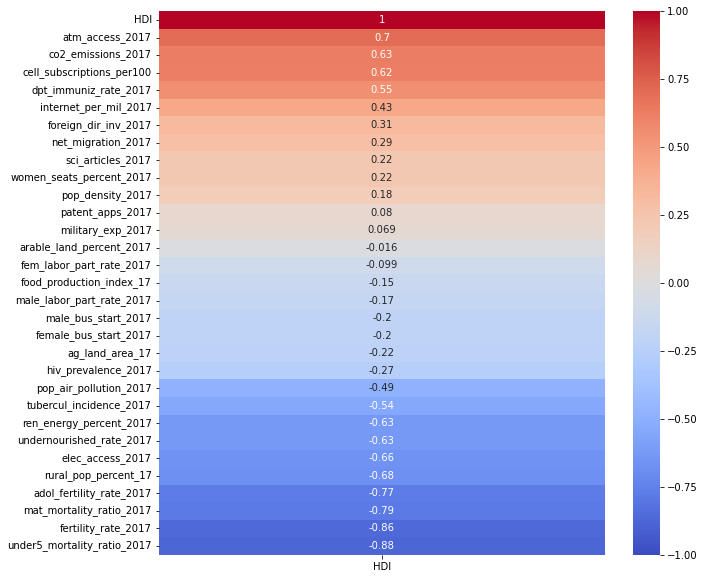

In [14]:
# distill features down
# comparing correlations of all numerical features to target 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['HDI']].sort_values(by = 'HDI', ascending=False), 
            annot=True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm'); 

-----
## Adding the Development Categories

In [15]:
# adding the development categorizations
df['development'] = df['HDI'].map(lambda x: 'low' if x < 0.55 else ('medium' if  x <= 0.699 else ('high' if x <= 0.799 else ('very high'))))

In [16]:
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI,development
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,43.448181,0.945227,27.710843,8.0,9.0,23.5,91.89,55.595550,0.509,low
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,10.799292,2.507985,30.454545,36.0,36.0,23.5,55.50,23.916555,0.582,medium
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,443.020376,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792,high
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,3415.717495,1.430273,32.142857,13.0,13.0,23.5,2.01,163.823404,0.867,very high
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,1285.099111,1.430273,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889,very high


In [17]:
# Adding a range for each of the development categorizations for modeling
df['dev_tier'] = df['development'].map({'low': 0, 'medium': 1, 'high': 2, 'very high': 3})
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI,development,dev_tier
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,0.945227,27.710843,8.0,9.0,23.5,91.89,55.595550,0.509,low,0
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,2.507985,30.454545,36.0,36.0,23.5,55.50,23.916555,0.582,medium,1
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792,high,2
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,1.430273,32.142857,13.0,13.0,23.5,2.01,163.823404,0.867,very high,3
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,1.430273,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889,very high,3


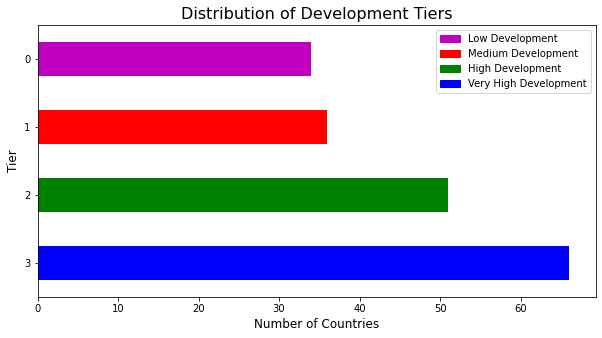

In [19]:
# mpatches library was sourced from matplotlib documentation: https://matplotlib.org/stable/api/patches_api.html

plt.figure(figsize = (10,5))

colormapping = {0:'blue',1:'green',2:'red', 3:'yellow'}
(df['dev_tier'].value_counts()).plot(kind = 'barh', color = ['b','g','r','m'])

plt.title('Distribution of Development Tiers', fontsize = 16)
plt.ylabel('Tier', fontsize = 12)
plt.xlabel('Number of Countries', fontsize = 12);

low = mpatches.Patch(color='m', label='Low Development')
med = mpatches.Patch(color='r', label='Medium Development')
hi = mpatches.Patch(color='g', label= 'High Development')
vhi = mpatches.Patch(color='b', label='Very High Development')
plt.legend(handles=[low,med,hi,vhi], loc=1);